In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data is in mm of rainfall
goal is to create a montecarlo simulator of monthly rain in a chosen region 
(let's choose Madhya Pradesh because supposedly it accounts for most of soybean production at 58% of total india)

In [284]:
url_1 = 'district_wise_rainfall_normal.csv'  # https://data.gov.in/catalog/rainfall-i
district_wise_dataset = pd.read_csv(url_1) 
url_2 = 'Sub_Division_IMD_2017'
subdiv_df = pd.read_csv(url_2)
district_name_mp = district_wise_dataset["STATE_UT_NAME"].unique()
district_name_mp.sort()
mp_string = district_name_mp[19]
district_wise_dataset.set_index(["STATE_UT_NAME", "DISTRICT"],inplace=True)

In [286]:
list_of_subdivs = subdiv_df['SUBDIVISION'].unique()
list_of_subdivs

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

In [287]:
district_wise_dataset.loc[mp_string]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
DISTRICT,,,,,,,,,,,,,,,,,
BETUL,7.5,8.5,9.3,5.9,6.4,137.0,290.6,293.4,197.5,49.4,13.4,9.9,1028.8,16.0,21.6,918.5,72.7
VIDISHA,14.0,8.2,5.1,1.4,4.4,110.3,356.2,376.0,162.5,24.0,11.9,10.8,1084.8,22.2,10.9,1005.0,46.7
BHIND,10.4,7.1,4.2,1.3,4.6,55.6,221.5,261.4,147.0,39.5,3.9,6.9,763.4,17.5,10.1,685.5,50.3
DATIA,9.1,8.5,5.0,3.4,6.6,62.2,246.0,293.0,174.6,39.8,4.1,7.9,860.2,17.6,15.0,775.8,51.8
DEWAS,7.5,4.0,3.8,1.3,6.2,127.9,311.6,330.7,179.6,34.4,13.5,10.9,1031.4,11.5,11.3,949.8,58.8
DHAR,3.3,1.0,1.4,0.8,4.1,126.4,266.3,261.5,172.6,34.8,11.1,2.8,886.1,4.3,6.3,826.8,48.7
GUNA,12.1,7.1,6.3,2.7,8.6,87.3,336.6,356.0,163.1,28.6,10.6,9.3,1028.3,19.2,17.6,943.0,48.5
GWALIOR,14.5,8.6,5.5,3.7,8.2,71.8,258.0,289.7,171.1,41.5,5.1,8.2,885.9,23.1,17.4,790.6,54.8
HOSHANGABAD,11.8,8.3,9.1,3.2,8.1,140.3,416.6,464.4,267.8,37.4,15.0,10.2,1392.2,20.1,20.4,1289.1,62.6


In [288]:
subdiv_df.set_index(['SUBDIVISION','YEAR'], inplace=True)

In [290]:
west_mp = subdiv_df.loc['West Madhya Pradesh']
east_mp = subdiv_df.loc['East Madhya Pradesh']
west_mp.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
YEAR,,,,,,,,,,,,,,,,,
1901,25.8,5.8,5.8,2.8,2.1,41.2,228.9,349.9,47.9,5.6,0.0,2.4,718.2,31.6,10.7,667.9,7.9
1902,22.1,8.4,0.0,2.0,5.9,35.9,401.9,179.4,194.1,37.9,10.0,14.2,911.7,30.5,8.0,811.2,62.0
1903,5.3,0.0,0.0,0.0,22.3,50.6,304.9,261.1,250.2,55.1,0.0,0.0,949.6,5.3,22.3,866.8,55.1
1904,3.2,15.5,14.8,0.0,12.0,96.6,273.0,218.6,125.9,3.3,1.8,9.6,774.4,18.7,26.9,714.1,14.7
1905,3.5,4.4,1.1,0.8,3.0,36.1,326.3,137.6,183.5,0.3,0.0,0.0,696.5,7.9,4.9,683.5,0.3


In [291]:
#cleaning nans
west_mp.isnull().values.any()


True

In [292]:
west_mp_annual = west_mp['ANNUAL']
east_mp_annual = east_mp['ANNUAL']
east_mp_annual.mean()


1203.0350427350427

In [294]:
columns_to_drop = west_mp.columns[12:]

In [295]:
#ok prune extra columns
west_mp.drop(columns=columns_to_drop, inplace=True)
east_mp.drop(columns=columns_to_drop, inplace=True)
east_mp

/var/folders/hq/62b5kbn954ggcv_0g7_hdfmh0000gn/T/ipykernel_97376/999589201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_mp.drop(columns=columns_to_drop, inplace=True)
/var/folders/hq/62b5kbn954ggcv_0g7_hdfmh0000gn/T/ipykernel_97376/999589201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_mp.drop(columns=columns_to_drop, inplace=True)


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,48.5,38.1,15.7,10.7,6.2,61.0,367.5,589.2,189.9,5.9,0.0,0.0
1902,14.9,8.9,0.0,3.6,2.7,28.0,411.9,227.0,236.6,17.0,27.6,6.1
1903,5.6,2.9,0.3,0.9,37.5,67.5,261.4,366.7,257.4,177.9,0.0,0.0
1904,2.0,15.3,48.2,0.0,8.6,109.9,443.2,316.6,135.6,44.8,3.2,16.9
1905,15.9,8.0,14.3,12.3,10.2,34.4,292.4,243.3,250.9,2.9,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2.0,43.4,14.1,9.5,0.3,311.9,456.2,480.8,78.0,124.2,0.5,1.0
2014,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9
2015,37.3,11.0,73.4,25.8,6.3,139.2,262.2,272.1,71.6,38.2,1.2,0.9


In [296]:
west_mp = west_mp.fillna(0)
west_mp.isnull().values.any()
east_mp = east_mp.fillna(0)
east_mp.isnull().values.any()
east_mp

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,48.5,38.1,15.7,10.7,6.2,61.0,367.5,589.2,189.9,5.9,0.0,0.0
1902,14.9,8.9,0.0,3.6,2.7,28.0,411.9,227.0,236.6,17.0,27.6,6.1
1903,5.6,2.9,0.3,0.9,37.5,67.5,261.4,366.7,257.4,177.9,0.0,0.0
1904,2.0,15.3,48.2,0.0,8.6,109.9,443.2,316.6,135.6,44.8,3.2,16.9
1905,15.9,8.0,14.3,12.3,10.2,34.4,292.4,243.3,250.9,2.9,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2013,2.0,43.4,14.1,9.5,0.3,311.9,456.2,480.8,78.0,124.2,0.5,1.0
2014,32.1,49.7,17.8,5.1,2.5,91.8,283.4,231.8,139.6,56.4,1.9,12.9
2015,37.3,11.0,73.4,25.8,6.3,139.2,262.2,272.1,71.6,38.2,1.2,0.9


In [297]:
east_mp.to_numpy().reshape(-1,1)

array([[48.5],
       [38.1],
       [15.7],
       ...,
       [18.8],
       [ 0.7],
       [ 0. ]])

In [298]:
12 * len(east_mp) * 0.1

140.4

In [302]:
12 * len(east_mp) - (12 * len(east_mp) * 0.1)

1263.6

In [307]:
west_mp.to_numpy().reshape(1,-1)[0]

array([25.8,  5.8,  5.8, ..., 13.5,  0.4,  2. ])

In [312]:
len(east_mp.to_numpy().reshape(1,-1)[0]), len(west_mp.to_numpy().reshape(1,-1)[0])

(1404, 1404)

In [318]:
x_axis = np.linspace(0,1403,len(west_mp.to_numpy().reshape(1,-1)[0]))

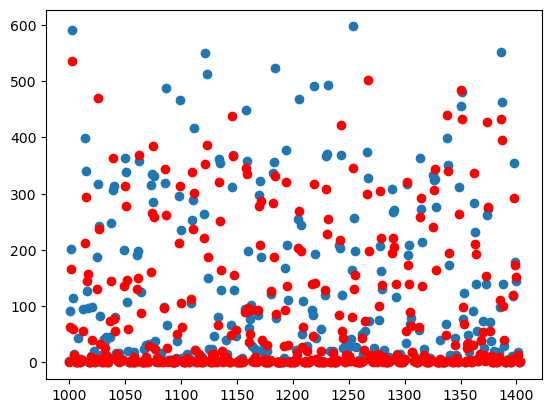

In [323]:

plt.scatter(x_axis[1000:1404], east_mp.to_numpy().reshape(1,-1)[0][1000:1404])
plt.scatter(x_axis[1000:1404], west_mp.to_numpy().reshape(1,-1)[0][1000:1404], color='red')

In [326]:
covariances = np.cov(west_mp.to_numpy().reshape(1,-1)[0][:], east_mp.to_numpy().reshape(1,-1)[0][:], rowvar = 0)
np.sqrt(covariances)

array([[120.72404889, 128.8616276 ],
       [128.8616276 , 146.54883499]])

In [327]:
np.corrcoef(west_mp.to_numpy().reshape(1,-1)[0][:], east_mp.to_numpy().reshape(1,-1)[0][:])

array([[1.        , 0.93857949],
       [0.93857949, 1.        ]])

In [330]:
some_y = np.array([-1,1,1])
some_x = np.array([3,2,1])
np.cov(some_x, some_y)
some_y, west_mp.to_numpy().reshape(1,-1)[0]

(array([-1,  1,  1]), array([25.8,  5.8,  5.8, ..., 13.5,  0.4,  2. ]))

Text(0.5, 1.0, 'average rainfall per month in eastern madhya pradesh (in mm)')

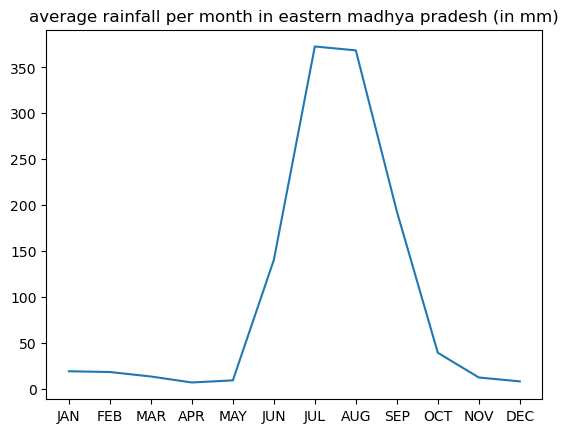

In [331]:
average_east_mp = east_mp.mean()
plt.plot(average_east_mp)
plt.title("average rainfall per month in eastern madhya pradesh (in mm)")

Text(0.5, 1.0, 'average rainfall per month in eastern madhya pradesh (in in)')

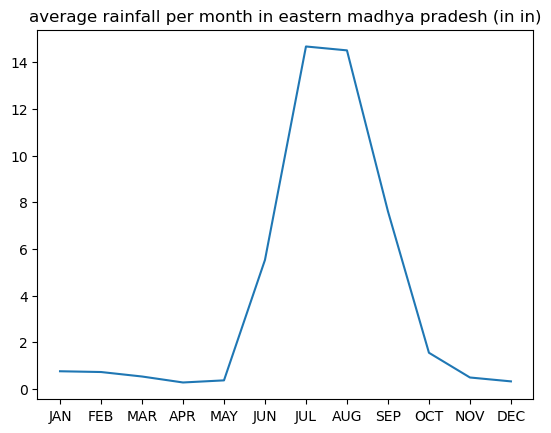

In [332]:
average_east_mp_inches = (east_mp / 25.4).mean()
plt.plot(average_east_mp_inches)
plt.title("average rainfall per month in eastern madhya pradesh (in in)")

Text(0.5, 1.0, 'average rainfall per month in western madhya pradesh (in in)')

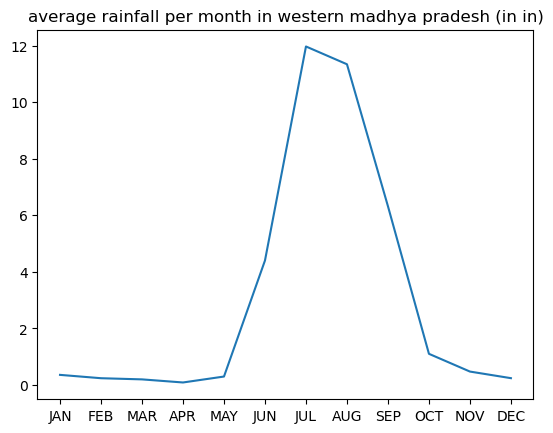

In [333]:
average_west_mp_inches = (west_mp / 25.4).mean()
plt.plot(average_west_mp_inches)
plt.title("average rainfall per month in western madhya pradesh (in in)")

In [334]:
#develop montecarlo simulator of rainfall (ie. random source of rain by random sampling dataset, maybe with weight bias towards more recent years)
# simple idea for now: normal distribution of total rainfall across all 6 months 
west_mp_monsoon = west_mp.drop(columns=['JAN','FEB','MAR','APR','MAY','DEC'])
east_mp_monsoon = east_mp.drop(columns=['JAN','FEB','MAR','APR','MAY','DEC'])
west_mp_monsoon['MONSOON'] = west_mp_monsoon.aggregate(np.sum, axis='columns')
east_mp_monsoon['MONSOON'] = east_mp_monsoon.aggregate(np.sum, axis='columns')
west_mp_monsoon = west_mp_monsoon['MONSOON']
east_mp_monsoon = east_mp_monsoon['MONSOON']
east_mp_monsoon


YEAR
1901    1213.5
1902     948.1
1903    1130.9
1904    1053.3
1905     823.9
         ...  
2013    1451.6
2014     804.9
2015     784.5
2016    1282.1
2017     815.4
Name: MONSOON, Length: 117, dtype: float64

In [335]:
# create normal distribution out of this dataset
east_monsoon_mean = east_mp_monsoon.mean()
east_monsoon_var = east_mp_monsoon.var()
east_monsoon_std = east_mp_monsoon.std()
east_monsoon_std, east_monsoon_std**2, east_monsoon_var

(211.3483630685731, 44668.13057176539, 44668.13057176539)

In [336]:
#set seed = 1302023
rng = np.random.default_rng(1302023)


In [69]:
random_10_years = rng.normal(east_monsoon_mean, east_monsoon_std, size = 10)
random_10_years

array([1307.18893863, 1536.59634277, 1075.77859306, 1339.59271095,
       1372.32222521, 1329.43334918, 1372.7010363 ,  630.9173875 ,
        920.70823368,  941.70250645])

In [70]:
#now we need to develop the function from rainfall to yield
# for now, use simplistic linear regression on yield and regression as dual variables
# soybean yield from 2007 to 2022 https://www.sopa.org/statistics/soybean-production-by-state/?search_type=search_by_period&arrive=&starting_year_value=2007&ending_year_value=2022&submit=Search
soy_yield = pd.read_excel('soybean_production_by_state.xltx')
soy_yield

,States,Kharif 2007,Unnamed: 2,Unnamed: 3,Kharif 2008,Unnamed: 5,Unnamed: 6,Kharif 2009,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Kharif 2020,Unnamed: 41,Unnamed: 42,Kharif 2021,Unnamed: 44,Unnamed: 45,Kharif 2022,Unnamed: 47,Unnamed: 48
0,NaN,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,...,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production,Sowing Area,Expected Yield,Estimated Production
1,Rajasthan,7.635,992,7.574,8.524,860,7.332,7.094,859,6.096,...,6.56,11.002,780,8.585,9.253,761,7.046,10.344,953,9.855
2,Madhya Pradesh,48.792,1045,51.009,51.434,1010,51.94,52.985,1040,55.087,...,40.107,58.541,714,41.774,55.687,939,52.292,50.645,1051,53.248
3,Maharashtra,26.515,1230,32.617,30.684,925,28.387,30.32,982,29.773,...,39.415,40.398,1125,45.446,43.848,1102,48.325,43.446,1080,46.911
4,Andhra Pradesh,1.07,1275,1.364,1.5,1040,1.56,1.81,1050,1.901,...,1.508,1.599,1028,1.644,-,NAN,-,-,NAN,-
5,Chhattisgarh,1.1,815,0.897,1.21,875,1.059,1.29,925,1.193,...,0.539,0.776,884,0.686,0.513,910,0.467,0.42,1050,0.441
6,Gujarat,-,NAN,-,-,NAN,-,-,NAN,-,...,0.861,1.492,972,1.45,2.237,1015,2.271,2.216,1087,2.409
7,Karnataka,1.62,945,1.531,1.99,1015,2.02,2.31,1025,2.368,...,2.694,3.32,1124,3.732,3.827,1005,3.846,4.376,1005,4.398
8,Others,1.764,810,1.429,0.9,866,0.779,0.9,926,0.833,...,1.377,1.257,988,1.242,1.129,975,1.101,1.286,1056,1.358
9,Telangana,-,NAN,-,-,NAN,-,-,NAN,-,...,-,-,NAN,-,3.488,1015,3.54,1.754,1005,1.763


In [71]:
soy_yield_mp = soy_yield.set_index('States')
soy_yield_mp = soy_yield_mp.loc['Madhya Pradesh']
expected_yield = soy_yield_mp.iloc[1::3] #in kilograms per hectare
print(expected_yield.mean()) #this may be low, since online sources + solenkiatal says crop yield is around 1.5 to 2.5 tons / ha



936.8125


In [351]:
#expected_yield, expected_yield[0:len(X)], expected_yield[len(X)]
expected_yield[len(X)], expected_yield

(838,
 Unnamed: 2     1045
 Unnamed: 5     1010
 Unnamed: 8     1040
 Unnamed: 11    1105
 Unnamed: 14    1076
 Unnamed: 17    1116
 Unnamed: 20     684
 Unnamed: 23     896
 Unnamed: 26     608
 Unnamed: 29    1020
 Unnamed: 32     838
 Unnamed: 35    1075
 Unnamed: 38     772
 Unnamed: 41     714
 Unnamed: 44     939
 Unnamed: 47    1051
 Name: Madhya Pradesh, dtype: object)

In [360]:
X.reset_index().iloc[len(X) -1,0:]

YEAR    2016.0
JAN       20.2
FEB        2.1
MAR       17.6
APR        0.1
MAY       17.9
JUN       99.0
JUL      552.2
AUG      462.3
SEP      139.6
OCT       29.0
NOV        0.0
DEC        0.0
Name: 9, dtype: float64

In [372]:
#learn linear regression map from rainfall to yield
X = east_mp.loc[2007:2017]
Y = expected_yield.iloc[0:len(X)]
X_train = X.reset_index().iloc[:len(X) - 1,1:]
X_test = X.reset_index().iloc[len(X) - 1,1:]

Y_train = Y.reset_index().iloc[:len(X) -1 ,1]
Y_test = Y.reset_index().iloc[len(X) -1,1]
X_test, Y_test

(JAN      4.6
 FEB      6.7
 MAR      2.0
 APR      0.0
 MAY     11.4
 JUN    119.0
 JUL    353.8
 AUG    179.1
 SEP    144.0
 OCT     18.8
 NOV      0.7
 DEC      0.0
 Name: 10, dtype: float64,
 838)

In [373]:
len(X), len(X_train)

(11, 10)

In [374]:
from sklearn.linear_model import LinearRegression


In [375]:
x_train = X_train.to_numpy()
y_train = Y_train.to_numpy()
x_test = X_test.to_numpy()

In [376]:
y_train = y_train.astype(float)
y_test = float(Y_test)
y_train, y_test

(array([1045., 1010., 1040., 1105., 1076., 1116.,  684.,  896.,  608.,
        1020.]),
 838.0)

In [377]:
lin_reg = LinearRegression().fit(x_train, y_train)
lin_reg

LinearRegression()

In [378]:
prediction_on_train = lin_reg.predict(x_train)


In [379]:
y_train, prediction_on_train

(array([1045., 1010., 1040., 1105., 1076., 1116.,  684.,  896.,  608.,
        1020.]),
 array([1045., 1010., 1040., 1105., 1076., 1116.,  684.,  896.,  608.,
        1020.]))

In [380]:
test_prediction = lin_reg.predict(x_test.reshape(1,-1))
y_test, test_prediction


(838.0, array([1192.71798055]))

In [381]:
x_axis = [x for x in range(len(y_train))]

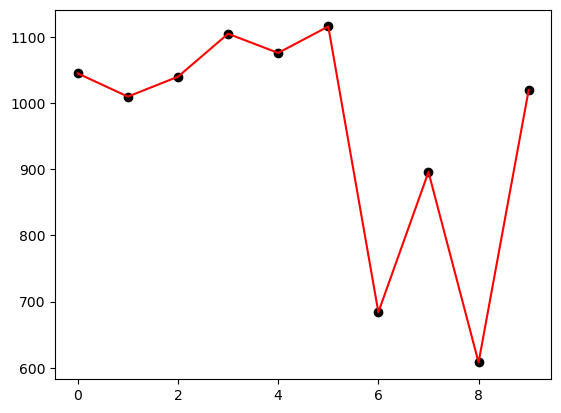

In [382]:
fig, ax = plt.subplots()
#ax.set_color_cycle(['red', 'black', 'yellow'])
plt.scatter(x_axis, y_train, color = 'black')
plt.plot(x_axis, prediction_on_train, color ='red')

overfitting because i have 12 features (from just monthly rainfall) and I have less data points than features 

In [383]:
#doesn't seem very good, let's try quadratic
from sklearn.preprocessing import PolynomialFeatures


In [384]:
quadratic = PolynomialFeatures(degree=2, include_bias=False)
quadratic_features = quadratic.fit_transform(x_train)
quadratic_model = LinearRegression().fit(quadratic_features, y_train)
quadratic_features

array([[7.0000000e+00, 2.6300000e+01, 8.6000000e+00, 2.9000000e+00,
        6.2000000e+00, 7.4800000e+01, 2.0780000e+02, 1.6260000e+02,
        1.3010000e+02, 3.1000000e+00, 2.2800000e+01, 1.5000000e+00,
        4.9000000e+01, 1.8410000e+02, 6.0200000e+01, 2.0300000e+01,
        4.3400000e+01, 5.2360000e+02, 1.4546000e+03, 1.1382000e+03,
        9.1070000e+02, 2.1700000e+01, 1.5960000e+02, 1.0500000e+01,
        6.9169000e+02, 2.2618000e+02, 7.6270000e+01, 1.6306000e+02,
        1.9672400e+03, 5.4651400e+03, 4.2763800e+03, 3.4216300e+03,
        8.1530000e+01, 5.9964000e+02, 3.9450000e+01, 7.3960000e+01,
        2.4940000e+01, 5.3320000e+01, 6.4328000e+02, 1.7870800e+03,
        1.3983600e+03, 1.1188600e+03, 2.6660000e+01, 1.9608000e+02,
        1.2900000e+01, 8.4100000e+00, 1.7980000e+01, 2.1692000e+02,
        6.0262000e+02, 4.7154000e+02, 3.7729000e+02, 8.9900000e+00,
        6.6120000e+01, 4.3500000e+00, 3.8440000e+01, 4.6376000e+02,
        1.2883600e+03, 1.0081200e+03, 8.0662000e

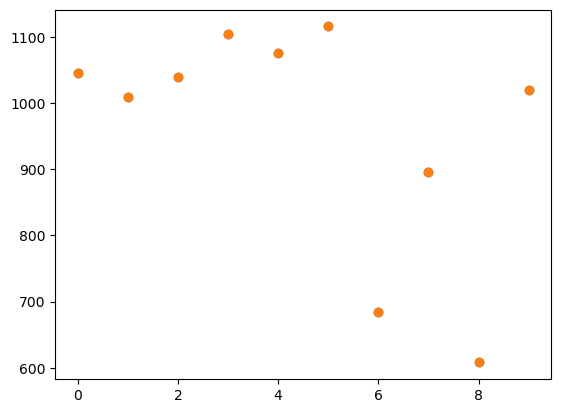

In [387]:
plt.scatter(x_axis, y_train)
plt.scatter(x_axis, quadratic_model.predict(quadratic_features))

looks a bit better as quadratic, this is good enough for now. 

In [83]:
# we need to develop the map from yield to cash
#data from marketing study done (2014 Solenkiatal)
# 2,195.00 2,258.00 2,290.00 2,241.00 in rupees per quintal received by the farmer
# but also 69,500.00 in returns, with costs of 32,071.44, so net income around 37,428.56
returns = 66080.00
yields = 20.65 
revenue_per_quintal = returns / yields
fixed_cost = 6251.75
variable_cost = 25711.87 - 901.43 # removed family cost as its not a direct cash cost
total_cost_per_hectare = fixed_cost + variable_cost
total_cost_per_hectare, revenue_per_quintal # 1 quintal = 100 kg of crops


(31062.19, 3200.0)

In [84]:
uniform_rainfall_numbers = np.arange(600,1500,5)
quad_unif_rain = quadratic.fit_transform(uniform_rainfall_numbers.reshape(-1,1))
predicted_yield = quadratic_model.predict(quad_unif_rain)

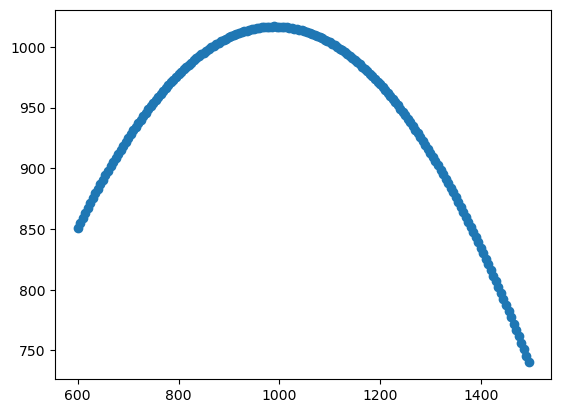

In [85]:
plt.scatter(uniform_rainfall_numbers, predicted_yield)

In [86]:
#now just run the money plot for these guys
rev_per_hectare = predicted_yield / 100 * revenue_per_quintal
profit_per_hectare = rev_per_hectare - total_cost_per_hectare
profit_per_hectare

array([-3.83156730e+03, -3.69661352e+03, -3.56339875e+03, -3.43192299e+03,
       -3.30218624e+03, -3.17418850e+03, -3.04792977e+03, -2.92341005e+03,
       -2.80062934e+03, -2.67958764e+03, -2.56028495e+03, -2.44272127e+03,
       -2.32689661e+03, -2.21281095e+03, -2.10046431e+03, -1.98985667e+03,
       -1.88098804e+03, -1.77385843e+03, -1.66846783e+03, -1.56481623e+03,
       -1.46290365e+03, -1.36273008e+03, -1.26429551e+03, -1.16759996e+03,
       -1.07264342e+03, -9.79425889e+02, -8.87947369e+02, -7.98207859e+02,
       -7.10207359e+02, -6.23945870e+02, -5.39423391e+02, -4.56639923e+02,
       -3.75595466e+02, -2.96290018e+02, -2.18723582e+02, -1.42896155e+02,
       -6.88077396e+01,  3.54166571e+00,  7.41520606e+01,  1.43023445e+02,
        2.10155819e+02,  2.75549182e+02,  3.39203535e+02,  4.01118878e+02,
        4.61295210e+02,  5.19732532e+02,  5.76430843e+02,  6.31390144e+02,
        6.84610434e+02,  7.36091713e+02,  7.85833983e+02,  8.33837242e+02,
        8.80101490e+02,  

In [87]:
beginning_index = -1
ending_index = -1
for i in range(len(profit_per_hectare)):
    if profit_per_hectare[i] > 0 and beginning_index == -1:
        beginning_index = i
    if profit_per_hectare[i] < 0 and beginning_index >= 0:
        ending_index = i
        break



In [88]:
profit_per_hectare[beginning_index], uniform_rainfall_numbers[beginning_index]

(3.5416657063433377, 785)

In [89]:
profit_per_hectare[ending_index], uniform_rainfall_numbers[ending_index]

(-53.64817473175572, 1200)

In [90]:
low_thresh, up_thresh = uniform_rainfall_numbers[beginning_index], uniform_rainfall_numbers[ending_index]

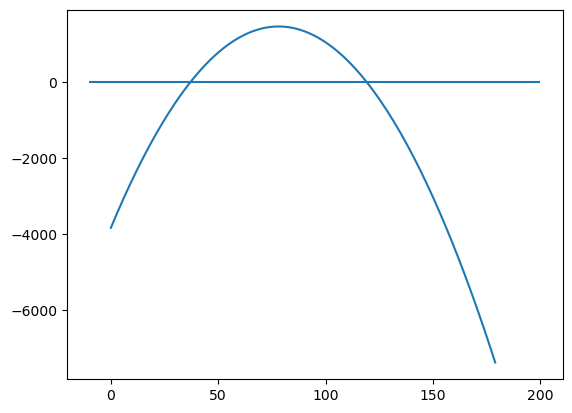

In [91]:
plt.plot(profit_per_hectare)
plt.hlines(y=0, xmin = -10, xmax = 200)


In [92]:
#now create simulation by randomly drawing from rainfall distribution, per hectare
def simulate_no_policy(n_trials, n_years, seed=98765):
    rng = np.random.default_rng(seed)
    random_years = rng.normal(east_monsoon_mean, east_monsoon_std, size = (n_trials,n_years))
    profit_n_trials = []
    for _ in range(n_trials):
        quad_i = quadratic.fit_transform(random_years[_].reshape(-1,1))
        yield_i = quadratic_model.predict(quad_i)
        profit_i = revenue_per_quintal * ( yield_i / 100 ) - total_cost_per_hectare
        profit_n_trials.append(np.sum(profit_i))
    return profit_n_trials
no_policy_output = simulate_no_policy(100, 1)

In [93]:
np.mean(no_policy_output) # single hectare

-882.307034748402

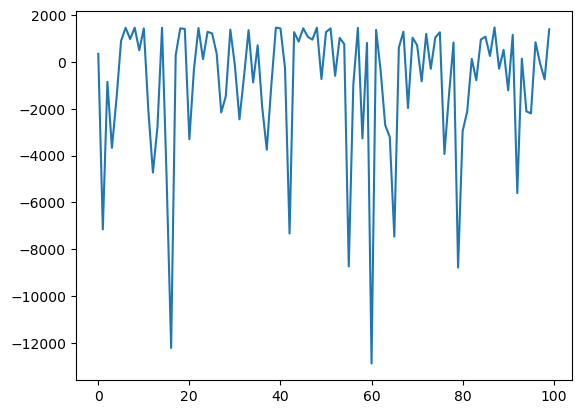

In [94]:
# under these assumptions, insurance less always results in a loss in the long run 
plt.plot(no_policy_output)

In [95]:
#now try naive single payout, single lower threshold insurance policy simulation
def simulate_naive_simple(n_trials, n_years, lower_threshold, payout, seed=98765):
    rng = np.random.default_rng(seed)
    random_years = rng.normal(east_monsoon_mean, east_monsoon_std, size = (n_trials,n_years))
    profit_n_trials = []
    for _ in range(n_trials):
        rainfall_i = random_years[_]
        insurance_payouts_i = [payout if x < lower_threshold else 0 for x in rainfall_i]
        quad_i = quadratic.fit_transform(random_years[_].reshape(-1,1))
        yield_i = quadratic_model.predict(quad_i)
        profit_i = revenue_per_quintal * ( yield_i / 100 ) - total_cost_per_hectare + insurance_payouts_i
        profit_n_trials.append(np.sum(profit_i))
    return profit_n_trials
naive_simple_profits = simulate_naive_simple(100, 1, low_thresh, 400)

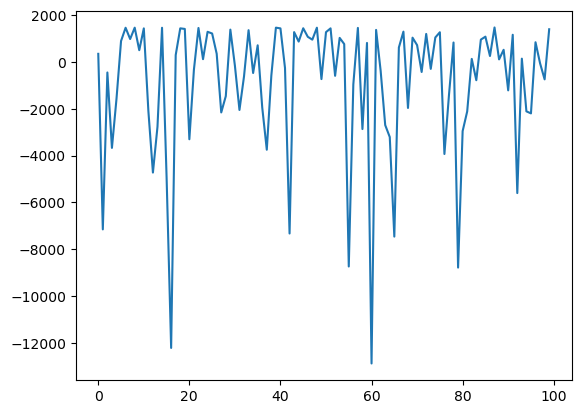

In [96]:
plt.plot(naive_simple_profits)

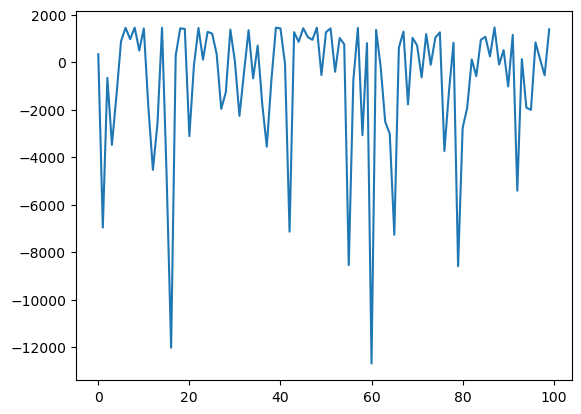

In [97]:
#now try naive single payout, double threshold insurance policy simulation
def simulate_double_threshold(n_trials, n_years, lower_threshold, upper_threshold, lower_payout, upper_payout, seed=98765):
    rng = np.random.default_rng(seed)
    random_years = rng.normal(east_monsoon_mean, east_monsoon_std, size = (n_trials,n_years))
    profit_n_trials = []
    rainfall_n_trials = []
    for _ in range(n_trials):
        rainfall_i = random_years[_]
        insurance_payouts_i = []
        for x in rainfall_i:
            if x < lower_threshold:
                insurance_payouts_i.append(lower_payout)
            elif x > upper_threshold:
                insurance_payouts_i.append(upper_payout)
            else:
                insurance_payouts_i.append(0)
        quad_i = quadratic.fit_transform(random_years[_].reshape(-1,1))
        yield_i = quadratic_model.predict(quad_i)
        rainfall_n_trials.append(yield_i)
        profit_i = revenue_per_quintal * ( yield_i / 100 ) - total_cost_per_hectare + insurance_payouts_i
        profit_n_trials.append(np.sum(profit_i))
    plt.plot(profit_n_trials)
    return profit_n_trials
double_threshold_profits = simulate_double_threshold(100, 1, low_thresh, up_thresh, 200, 200)

In [98]:
#insurance policy parameters, in expectation 

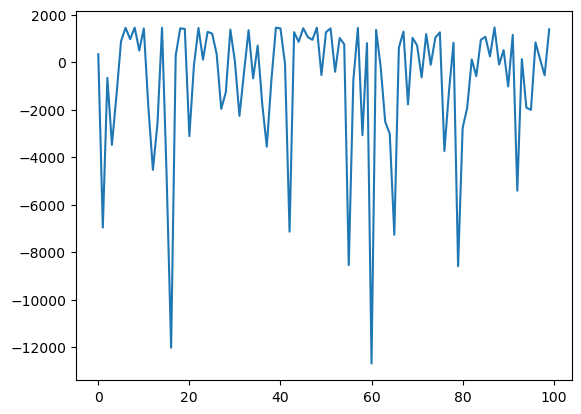

In [99]:
plt.plot(double_threshold_profits)

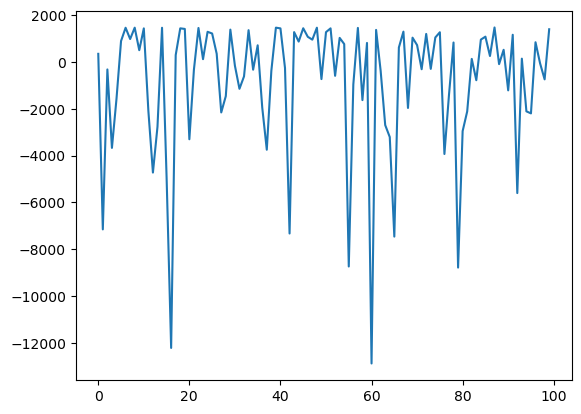

In [100]:
#now try naive linear payout, single lower threshold insurance policy simulation
def simulate_linear_payout(n_trials, n_years, lower_threshold, lower_payout, seed=98765):
    rng = np.random.default_rng(seed)
    random_years = rng.normal(east_monsoon_mean, east_monsoon_std, size = (n_trials,n_years))
    profit_n_trials = []
    for _ in range(n_trials):
        rainfall_i = random_years[_]
        insurance_payouts_i = []
        for x in rainfall_i:
            if x < lower_threshold:
                insurance_payouts_i.append(lower_payout * (lower_threshold - x))
            else:
                insurance_payouts_i.append(0)
        quad_i = quadratic.fit_transform(random_years[_].reshape(-1,1))
        yield_i = quadratic_model.predict(quad_i)
        profit_i = revenue_per_quintal * ( yield_i / 100 ) - total_cost_per_hectare + insurance_payouts_i
        profit_n_trials.append(np.sum(profit_i))
    plt.plot(profit_n_trials)
    return profit_n_trials
linear_profits = simulate_linear_payout(100, 1, low_thresh, 10)

break up into monthly rain (more granualr vector), maybe try add more months in the beginnings, total, monthly, cumulative (infer things from weights), regress on each, just try to remove variables / preven overfitting them

variables: growing degree days (find base temperature, which is 54 for soybeans), humidity 

1. make sure low troughs are good 
2. rainfall multiple factors, growing degree days into the function

insurance policies, you just buy x amount of insurance 

1. vary over cash and insurance
2. one extreme is cash poor, contrasinted by cash and can't buy as much insurance as eoptimal 
3. other extreme is assume unconstrained 

assume unconstrained

demonstrate that
1. adding second weather factor improves yield (duh)
2. adding second weather factor is feasible for insurance 
3. show that double threshold is better than single threshold
    time to bankruptcy
    utility function calculate the expected utility 
    shortfall from assumed threshold on income, expected shortfall 
    cash after 5 years from some x assumed cash (distribution) 
4. show that annual rainfall is not useful as opposed to monthly 
5. 